# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd

file_path = 'sinasc_RO_2019.csv'
sinasc_data = pd.read_csv(file_path)

print(sinasc_data.head())
print(sinasc_data.dtypes)



   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1     

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
def categorizar_apgar(apgar):
    if pd.isna(apgar):
        return None
    if 0 <= apgar <= 3:
        return 'asfixia grave'
    elif 4 <= apgar <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar <= 7:
        return 'asfixia leve'
    elif 8 <= apgar <= 10:
        return 'normal'
    else:
        return None

sinasc_data['APGAR5_categoria'] = sinasc_data['APGAR5'].apply(categorizar_apgar)

print(sinasc_data[['APGAR5', 'APGAR5_categoria']].head())


   APGAR5 APGAR5_categoria
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Figure size 1400x800 with 0 Axes>

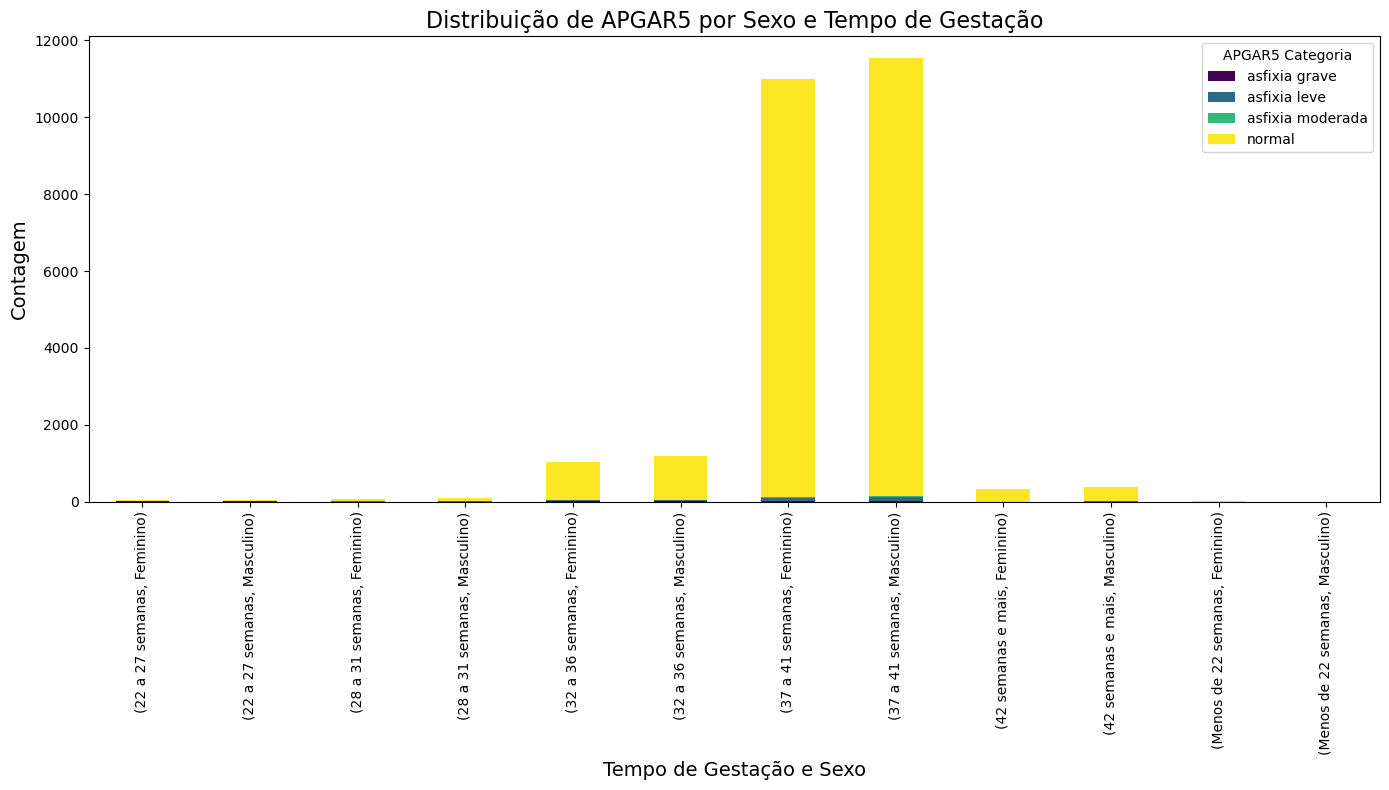

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

tabela_cruzada = pd.crosstab(index=[sinasc_data['GESTACAO'], sinasc_data['SEXO']], columns=sinasc_data['APGAR5_categoria'])

tabela_cruzada.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação', fontsize=16)
plt.xlabel('Tempo de Gestação e Sexo', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='APGAR5 Categoria')
plt.tight_layout()
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
tabela_cruzada_apgar_gestacao = pd.crosstab(sinasc_data['GESTACAO'], sinasc_data['APGAR5'])
print(tabela_cruzada_apgar_gestacao)


APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [9]:
percentuais_linha_apgar_gestacao = tabela_cruzada_apgar_gestacao.div(tabela_cruzada_apgar_gestacao.sum(axis=1), axis=0) * 100
print(percentuais_linha_apgar_gestacao)


APGAR5                    0.0       1.0        2.0       3.0       4.0   \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                   5.0       6.0        7.0        8.0        9.0   \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492390  0.760967   2.506714  16.204118  58.504924   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [11]:
print(sinasc_data['GESTACAO'].unique())


['37 a 41 semanas' '42 semanas e mais' '32 a 36 semanas' '22 a 27 semanas'
 '28 a 31 semanas' nan 'Menos de 22 semanas']


In [13]:
import numpy as np

def converter_gestacao(gestacao):
    try:
        if 'menos' in gestacao.lower():
            return 22  
        if 'a' in gestacao.lower():
            partes = gestacao.split(' a ')
            return (int(partes[0]) + int(partes[1])) / 2
        return np.nan
    except:
        return np.nan

sinasc_data['GESTACAO_num'] = sinasc_data['GESTACAO'].apply(converter_gestacao)

print(sinasc_data[['GESTACAO', 'GESTACAO_num']].head())


          GESTACAO  GESTACAO_num
0  37 a 41 semanas           NaN
1  37 a 41 semanas           NaN
2  37 a 41 semanas           NaN
3  37 a 41 semanas           NaN
4  37 a 41 semanas           NaN


<Figure size 1400x800 with 0 Axes>

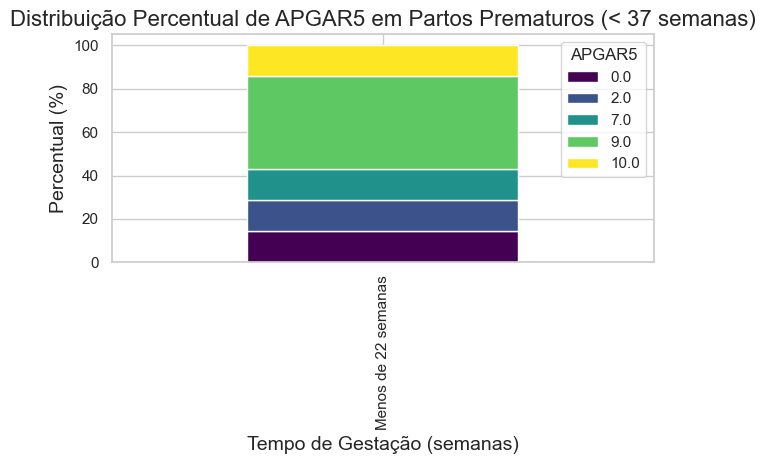

In [53]:
dados_prematuros = sinasc_data[sinasc_data['GESTACAO_num'] < 37]

tabela_cruzada_prematuros = pd.crosstab(dados_prematuros['GESTACAO'], dados_prematuros['APGAR5'])

percentuais_linha_prematuros = tabela_cruzada_prematuros.div(tabela_cruzada_prematuros.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
percentuais_linha_prematuros.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribuição Percentual de APGAR5 em Partos Prematuros (< 37 semanas)', fontsize=16)
plt.xlabel('Tempo de Gestação (semanas)', fontsize=14)
plt.ylabel('Percentual (%)', fontsize=14)
plt.legend(title='APGAR5')
plt.tight_layout()
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

### Gráfico de dispersão

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sinasc_data['PESO'] = pd.to_numeric(sinasc_data['PESO'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sinasc_data, x='PESO', y='APGAR5', alpha=0.6)
plt.title('Relação entre APGAR5 e Peso do Bebê', fontsize=16)
plt.xlabel('Peso do Bebê (gramas)', fontsize=14)
plt.ylabel('APGAR5', fontsize=14)
plt.grid(True)
plt.show()


### Gráfico de Caixa (Boxplot)

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=sinasc_data, x='APGAR5', y='PESO')
plt.title('Distribuição do Peso do Bebê por APGAR5', fontsize=16)
plt.xlabel('APGAR5', fontsize=14)
plt.ylabel('Peso do Bebê (gramas)', fontsize=14)
plt.grid(True)
plt.show()
